In [1]:
# Logistic Regression training

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('ecommerce_data.csv')
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [3]:
def get_data():
    df = pd.read_csv('ecommerce_data.csv')
    data = df.as_matrix() # turning into a numpy matrix
    
    ### want to split out X and Y columns ###
    
    X = data[:, :-1]  # all rows and all columns except the last one
    Y = data[:, -1] # all rows and last column
    
    ### Normalize the numerical columns ###
    
    X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()  # n_products viewed
    X[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()  # visit_duration
    
    ### Work on the Categorical Columns ###
    
    # time_of_day has 4 different categorical values(0, 1, 2, 3). i.e. 24 hrs have been divided into 6 hrs each intervals.
    N, D = X.shape # original shape of the data i.e. (500, 5)
    X2 = np.zeros((N, D + 3))  # creating a new array with a new shape
    X2[:, 0:(D - 1)] = X[:, 0:(D - 1)]  # All rows and from 0th column to (D - 1) columns all are same
    
    # for other four columns we will do a One-hot encoding
    for n in range(N):
        t = int(X[n, D - 1])  # (D-1) column is the time_of_day
        X2[n, t+D-1] = 1 # when t=0, t+D-1 = 4 i.e. index = 4 means 5th column set the value to 1 and so on ...
    
    return X2, Y

In [4]:
# Now for the logistic class we only want the binary data and not the full data set-
def get_binary_data():
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

In [5]:
X, Y = get_binary_data()
X, Y = shuffle(X, Y)

In [6]:
Xtrain = X[:-100]
Ytrain = Y[:-100]

In [7]:
Xtest = X[-100:]
Ytest = Y[-100:]

In [8]:
# Let's randomly initialize the weights again-
D = X.shape[1]  # no. of predictors
W = np.random.randn(D)
b = 0

In [9]:
def sigmoid(a):
    return 1/(1 + np.exp(-a))

In [10]:
def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

In [11]:
def classification_rate(Y, P):
    return np.mean(Y == P)

In [12]:
def cross_entropy(T, pY):  # i.e pY given X
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))   # negative log-likelihood for all the data points

In [13]:
train_costs = []
test_costs = []
learning_rate = 0.001

for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    # Now we will do the gradient descent. The below two equations come from the result of minimizing the Cross Entropy Error fn
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate*(pYtrain - Ytrain).sum()  # bias
    
    if i % 1000 == 0:
        print(i, ctrain, ctest)
        
print("Final train classification_rate: ", classification_rate(Ytrain, np.round(pYtrain)))
print("Final test classification_rate: ", classification_rate(Ytest, np.round(pYtest)))

0 0.864194001583 0.823101749432
1000 0.198296752556 0.151248247783
2000 0.197602403256 0.147029564739
3000 0.197570851787 0.146229594277
4000 0.197569111835 0.146047280966
5000 0.197569012056 0.146003951197
6000 0.197569006283 0.145993547921
7000 0.197569005948 0.145991043916
8000 0.197569005929 0.145990440848
9000 0.197569005927 0.145990295582
Final train classification_rate:  0.969798657718
Final test classification_rate:  0.97


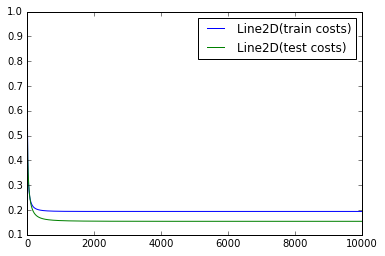

In [30]:
legend1, = plt.plot(train_costs, label = 'train costs')
legend2, = plt.plot(test_costs, label = 'test costs')
plt.legend([legend1, legend2])
plt.show()